# Laboratorio 2
### Roberto Rios 20979
### Javier Mombiela 20067

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.regularizers import l2
from keras.models import Sequential
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.layers import Dense, BatchNormalization, Dropout

In [3]:
# cargando el dataset
data = pd.read_csv('movie_statistic_dataset.csv')

# Reemplazar los valores "-" por NaN (nulos) y eliminar la fila correspondiente
data = data.replace(["-", "\\N"], np.nan)
data.dropna(inplace=True)
print(data.count())

movie_title             3490
production_date         3490
genres                  3490
runtime_minutes         3490
director_name           3490
director_professions    3490
director_birthYear      3490
director_deathYear      3490
movie_averageRating     3490
movie_numerOfVotes      3490
approval_Index          3490
Production budget $     3490
Domestic gross $        3490
Worldwide gross $       3490
dtype: int64


In [4]:
data

,movie_title,production_date,genres,runtime_minutes,director_name,director_professions,director_birthYear,director_deathYear,movie_averageRating,movie_numerOfVotes,approval_Index,Production budget $,Domestic gross $,Worldwide gross $
0,Avatar: The Way of Water,2022-12-09,"Action,Adventure,Fantasy",192.0,James Cameron,"writer,producer,director",1954,alive,7.8,277543.0,7.061101,460000000,667830256,2265935552
2,Pirates of the Caribbean: On Stranger Tides,2011-05-20,"Action,Adventure,Fantasy",137.0,Rob Marshall,"director,miscellaneous,producer",1960,alive,6.6,533763.0,6.272064,379000000,241071802,1045713802
3,Avengers: Age of Ultron,2015-04-22,"Action,Adventure,Sci-Fi",141.0,Joss Whedon,"writer,producer,director",1964,alive,7.3,870573.0,7.214013,365000000,459005868,1395316979
5,Justice League,2017-11-13,"Action,Adventure,Fantasy",120.0,Zack Snyder,"director,producer,writer",1966,alive,6.1,456977.0,5.717212,300000000,229024295,655945209
6,Spectre,2015-10-06,"Action,Adventure,Thriller",148.0,Sam Mendes,"producer,director,miscellaneous",1965,alive,6.8,445461.0,6.375644,300000000,200074175,879077344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4375,Super Size Me,2004-05-07,Documentary,100.0,Morgan Spurlock,"producer,writer,director",1970,alive,7.2,110078.0,6.017902,65000,11529368,22233808
4376,The Brothers McMullen,1995-08-09,"Comedy,Drama,Romance",98.0,Edward Burns,"actor,writer,producer",1968,alive,6.6,7986.0,4.231464,50000,10426506,10426506
4377,Gabriela,2001-03-16,"Drama,Romance",93.0,Vincent Jay Miller,"producer,director,writer",1973,alive,4.9,1593.0,2.526405,50000,2335352,2335352
4378,Tiny Furniture,2010-11-12,"Comedy,Drama,Romance",98.0,Lena Dunham,"writer,actress,producer",1986,alive,6.2,14595.0,4.242085,50000,391674,424149


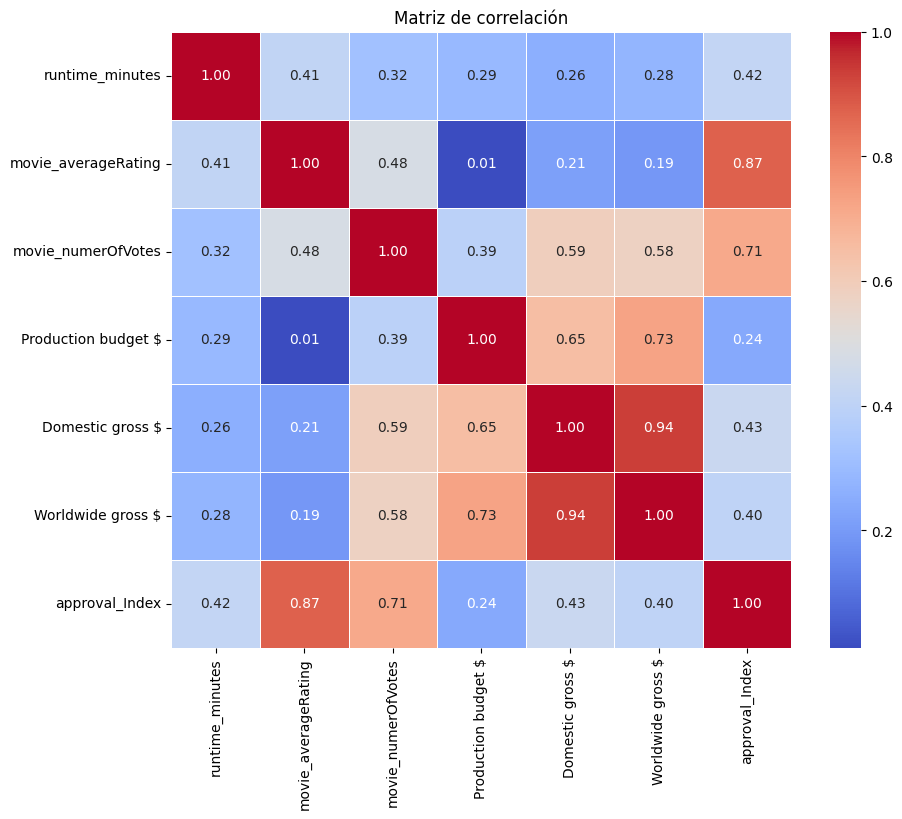

In [5]:
numeric_columns = ["runtime_minutes", "director_birthYear", "movie_averageRating", "movie_numerOfVotes",
                   "Production budget $", "Domestic gross $", "Worldwide gross $", "approval_Index"]

# Filtrar el DataFrame con las columnas numéricas
data_numeric = data[numeric_columns]

# Calcular la matriz de correlación
correlation_matrix = data_numeric.corr()

# Visualizar la matriz de correlación en un heatmap
plt.figure(figsize=(10, 8))
plt.title("Matriz de correlación")
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.show()

In [6]:
#definimos las variables que tengan mayor correlacion a 0.5
X = data[['movie_averageRating', 'movie_numerOfVotes']]
y = data['approval_Index']
X = np.asarray(X)
y = np.asarray(y)

# Estandarizar los datos
scaler = StandardScaler()
X = scaler.fit_transform(X)

# separando los datos de entrenamiento y prueba
X = X.astype(float)
y = y.astype(float)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [7]:
# plot?metric: funcion para graficar metricas de entrenamiento y validacion
def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

## Primer Modelo
#### 6 capas, Relu y Batchnormalization

In [8]:
batched_model1 = Sequential([
    Dense(64, input_shape=(2,), activation="relu"),
    BatchNormalization(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dense(1, activation='linear')
])

In [9]:
batched_model1.compile(
    optimizer='adam',
    loss='mean_squared_error',
    metrics=['mean_absolute_error']
)

In [10]:
batched_history1 =  batched_model1.fit(
    X_train, 
    y_train, 
    epochs=75, 
    validation_split=0.25, 
    batch_size=32,
    verbose=2 
)

Epoch 1/75
66/66 - 2s - loss: 23.3703 - mean_absolute_error: 4.7937 - val_loss: 18.8778 - val_mean_absolute_error: 4.1623 - 2s/epoch - 36ms/step
Epoch 2/75
66/66 - 0s - loss: 13.4029 - mean_absolute_error: 3.5984 - val_loss: 7.4155 - val_mean_absolute_error: 2.4563 - 207ms/epoch - 3ms/step
Epoch 3/75
66/66 - 0s - loss: 3.9289 - mean_absolute_error: 1.8613 - val_loss: 1.9278 - val_mean_absolute_error: 1.1046 - 194ms/epoch - 3ms/step
Epoch 4/75
66/66 - 0s - loss: 0.4943 - mean_absolute_error: 0.5788 - val_loss: 1.0758 - val_mean_absolute_error: 0.8915 - 209ms/epoch - 3ms/step
Epoch 5/75
66/66 - 0s - loss: 0.1994 - mean_absolute_error: 0.3417 - val_loss: 0.7485 - val_mean_absolute_error: 0.6907 - 208ms/epoch - 3ms/step
Epoch 6/75
66/66 - 0s - loss: 0.1766 - mean_absolute_error: 0.3102 - val_loss: 0.5099 - val_mean_absolute_error: 0.5536 - 185ms/epoch - 3ms/step
Epoch 7/75
66/66 - 0s - loss: 0.1493 - mean_absolute_error: 0.2967 - val_loss: 0.2341 - val_mean_absolute_error: 0.3557 - 192ms/e

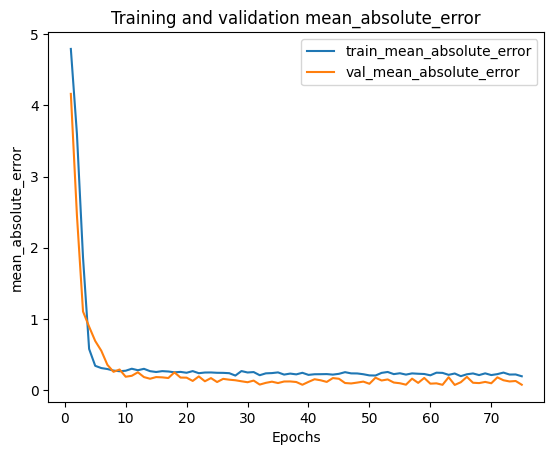

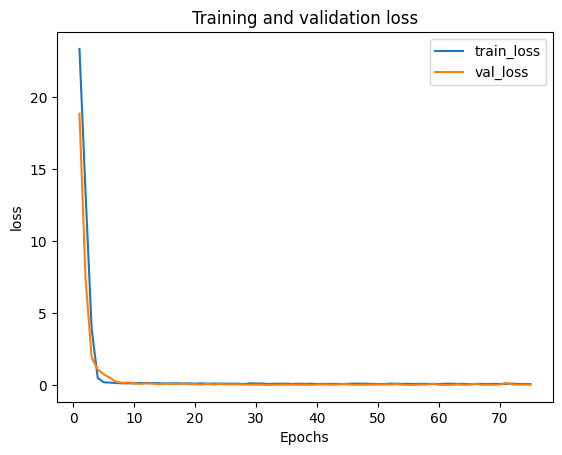

22/22 - 0s - loss: 0.0150 - mean_absolute_error: 0.0691 - 48ms/epoch - 2ms/step


[0.015006226487457752, 0.06907380372285843]

In [11]:
plot_metric(batched_history1, 'mean_absolute_error')
plot_metric(batched_history1, 'loss')
batched_model1.evaluate(X_test, y_test, verbose=2)

In [12]:
y_hat = batched_model1.predict(X_train)
y_hat

88/88 [==============================] - 0s 1ms/step


array([[4.699784 ],
       [3.6420717],
       [2.8041954],
       ...,
       [5.4004006],
       [4.4312234],
       [4.0691924]], dtype=float32)

In [13]:
y_train

array([4.75174439, 3.6051761 , 4.63165365, ..., 5.35233095, 4.31228255,
       3.96202543])

In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae_1 = mean_absolute_error(y_hat, y_train)
mse_1 = mean_squared_error(y_hat, y_train)
r2_1 = r2_score(y_hat, y_train)

print("MAE modelo 1:", mae_1)
print("MSE modelo 1:", mse_1)
print("R2 modelo 1:", r2_1)

MAE modelo 1: 0.07122560943029721
MSE modelo 1: 0.019225496907922395
R2 modelo 1: 0.9884872830843957


## Segundo Modelo
#### 3 capas, Sigmoid y Dropout

In [15]:
batched_model2 = Sequential([
    Dense(64, input_shape=(2,), activation="sigmoid"),
    Dropout(0.5),
    Dense(32, activation='sigmoid'),
    Dropout(0.5),
    Dense(1, activation='linear')
])

In [16]:
batched_model2.compile(
    optimizer = 'adam',
    loss = 'mean_squared_error',
    metrics = ['mean_absolute_error']
)

In [17]:
batched_history2 =  batched_model2.fit(
    X_train, 
    y_train, 
    epochs=75, 
    validation_split=0.25, 
    batch_size=32,
    verbose=2 
)

Epoch 1/75
66/66 - 1s - loss: 17.7495 - mean_absolute_error: 3.8317 - val_loss: 6.9892 - val_mean_absolute_error: 2.3665 - 819ms/epoch - 12ms/step
Epoch 2/75
66/66 - 0s - loss: 5.9607 - mean_absolute_error: 2.0199 - val_loss: 2.9366 - val_mean_absolute_error: 1.3987 - 115ms/epoch - 2ms/step
Epoch 3/75
66/66 - 0s - loss: 4.1300 - mean_absolute_error: 1.6246 - val_loss: 1.9014 - val_mean_absolute_error: 1.0861 - 116ms/epoch - 2ms/step
Epoch 4/75
66/66 - 0s - loss: 3.6236 - mean_absolute_error: 1.5111 - val_loss: 1.5755 - val_mean_absolute_error: 0.9854 - 141ms/epoch - 2ms/step
Epoch 5/75
66/66 - 0s - loss: 3.4447 - mean_absolute_error: 1.4877 - val_loss: 1.4462 - val_mean_absolute_error: 0.9442 - 123ms/epoch - 2ms/step
Epoch 6/75
66/66 - 0s - loss: 3.4517 - mean_absolute_error: 1.4717 - val_loss: 1.3581 - val_mean_absolute_error: 0.9134 - 125ms/epoch - 2ms/step
Epoch 7/75
66/66 - 0s - loss: 3.2036 - mean_absolute_error: 1.4087 - val_loss: 1.2653 - val_mean_absolute_error: 0.8791 - 121ms/

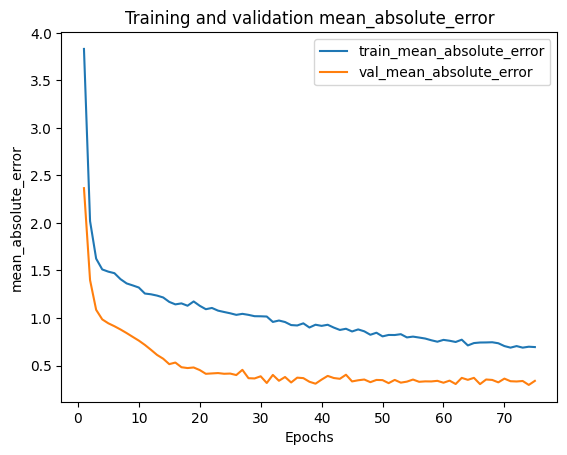

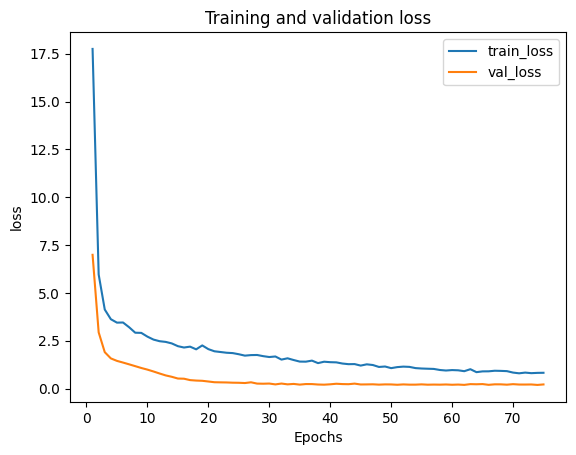

22/22 - 0s - loss: 0.2035 - mean_absolute_error: 0.3414 - 38ms/epoch - 2ms/step


[0.20353105664253235, 0.3413504362106323]

In [18]:
plot_metric(batched_history2, 'mean_absolute_error')
plot_metric(batched_history2, 'loss')
batched_model2.evaluate(X_test, y_test, verbose=2)

In [19]:
y_hat2 = batched_model2.predict(X_train)
y_hat2

88/88 [==============================] - 0s 1ms/step


array([[4.366375 ],
       [3.534906 ],
       [5.7251244],
       ...,
       [4.9888263],
       [4.3100176],
       [4.1935225]], dtype=float32)

In [20]:
y_train

array([4.75174439, 3.6051761 , 4.63165365, ..., 5.35233095, 4.31228255,
       3.96202543])

In [ ]:
mae_2 = mean_absolute_error(y_hat2, y_train)
mse_2 = mean_squared_error(y_hat2, y_train)
r2_2 = r2_score(y_hat2, y_train)

print("MAE modelo 2:", mae_2)
print("MSE modelo 2:", mse_2)
print("R2 modelo 2:", r2_2)

## Tercer Modelo
#### 9 capas, tanh y L2

In [21]:
batched_model3 = Sequential([
    Dense(128, input_shape=(2,), activation="tanh", kernel_regularizer=l2(0.01)),
    Dense(128, activation='tanh', kernel_regularizer=l2(0.01)),
    Dense(64, activation='tanh', kernel_regularizer=l2(0.01)),
    Dense(32, activation='tanh', kernel_regularizer=l2(0.01)),
    Dense(16, activation='tanh', kernel_regularizer=l2(0.01)),
    Dense(8, activation='tanh', kernel_regularizer=l2(0.01)),
    Dense(4, activation='tanh', kernel_regularizer=l2(0.01)),
    Dense(2, activation='tanh', kernel_regularizer=l2(0.01)),
    Dense(1, activation='linear')
])

In [22]:
batched_model3.compile(
    optimizer='adam',
    loss='mean_squared_error',
    metrics=['mean_absolute_error']
)

In [23]:
batched_history3 =  batched_model3.fit(
    X_train, 
    y_train, 
    epochs=75, 
    validation_split=0.25, 
    batch_size=32,
    verbose=2 
)

Epoch 1/75
66/66 - 2s - loss: 18.5353 - mean_absolute_error: 3.7192 - val_loss: 15.5706 - val_mean_absolute_error: 3.3559 - 2s/epoch - 26ms/step
Epoch 2/75
66/66 - 0s - loss: 14.4767 - mean_absolute_error: 3.2130 - val_loss: 13.5244 - val_mean_absolute_error: 3.1148 - 145ms/epoch - 2ms/step
Epoch 3/75
66/66 - 0s - loss: 12.6011 - mean_absolute_error: 2.9861 - val_loss: 11.7968 - val_mean_absolute_error: 2.9019 - 144ms/epoch - 2ms/step
Epoch 4/75
66/66 - 0s - loss: 11.0121 - mean_absolute_error: 2.7835 - val_loss: 10.3322 - val_mean_absolute_error: 2.7081 - 145ms/epoch - 2ms/step
Epoch 5/75
66/66 - 0s - loss: 9.6767 - mean_absolute_error: 2.5988 - val_loss: 9.1339 - val_mean_absolute_error: 2.5439 - 141ms/epoch - 2ms/step
Epoch 6/75
66/66 - 0s - loss: 8.5389 - mean_absolute_error: 2.4237 - val_loss: 8.0421 - val_mean_absolute_error: 2.3604 - 152ms/epoch - 2ms/step
Epoch 7/75
66/66 - 0s - loss: 7.5562 - mean_absolute_error: 2.2632 - val_loss: 7.1290 - val_mean_absolute_error: 2.2059 - 15

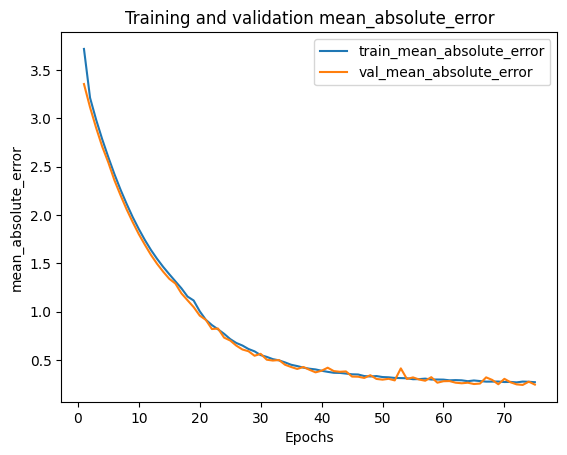

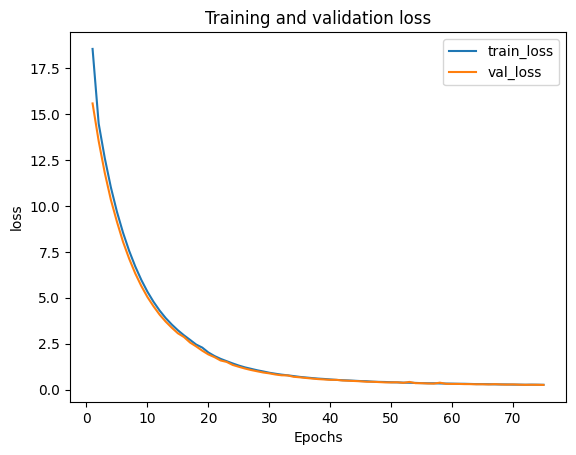

22/22 - 0s - loss: 0.2449 - mean_absolute_error: 0.2510 - 43ms/epoch - 2ms/step


[0.244937464594841, 0.2509555220603943]

In [24]:
plot_metric(batched_history3, 'mean_absolute_error')
plot_metric(batched_history3, 'loss')
batched_model3.evaluate(X_test, y_test, verbose=2)

In [25]:
y_hat3 = batched_model3.predict(X_train)
y_hat3

88/88 [==============================] - 0s 1ms/step


array([[4.8032494],
       [3.4074318],
       [5.7792873],
       ...,
       [5.21718  ],
       [4.41018  ],
       [4.259198 ]], dtype=float32)

In [26]:
y_train

array([4.75174439, 3.6051761 , 4.63165365, ..., 5.35233095, 4.31228255,
       3.96202543])

In [ ]:
mae_3 = mean_absolute_error(y_hat3, y_train)
mse_3 = mean_squared_error(y_hat3, y_train)
r2_3 = r2_score(y_hat3, y_train)

print("MAE modelo 3:", mae_3)
print("MSE modelo 3:", mse_3)
print("R2 modelo 3:", r2_3)